# Basic model

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

Keras

In [2]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


## Pickle handler

In [10]:
class ModelSaver:
    def __init__(self, name = 'model', model = None):
        self.model = model
        self.fileName = name + '.pickle'
    def save(self, model = None):
        if (model == None):
            model = self.model
        pickle.dump(model, open(self.fileName, 'wb'))
    def load(self):
        model = pickle.load(open(self.fileName, 'rb'))
        return model

## Loading up the data

In [11]:
path = '../training-data-preprocessed/'
modelSaver = ModelSaver(path + 'data3')

In [12]:
data = modelSaver.load()

In [13]:
xTrain = data['x_train'].transpose(0, 2, 3, 1)
yTrain = to_categorical(data['y_train'], num_classes=43)

xTest = data['x_test'].transpose(0, 2, 3, 1)
yTest = to_categorical(data['y_test'], num_classes=43)

xValid = data['x_validation'].transpose(0, 2, 3, 1)
yValid = to_categorical(data['y_validation'], num_classes=43)

labels = data['labels']

In [19]:
def showImage(img):
    low, high = np.min(img), np.max(img)
    img = (img - low) / (high - low)
    plt.imshow(img.astype('float32'), cmap=plt.get_cmap('gray_r'))
    plt.show()

In [26]:
yTrain[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## Set up the model

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(xTrain, yTrain,
              batch_size=10, epochs = 5,
              validation_data = (xValid, yValid),
              verbose=0)

Train on 86989 samples, validate on 4410 samples
Epoch 1/5
 - 578s - loss: 1.0272 - accuracy: 0.7011 - val_loss: 0.5584 - val_accuracy: 0.8485
Epoch 2/5
 - 506s - loss: 0.5246 - accuracy: 0.8454 - val_loss: 0.6495 - val_accuracy: 0.8449
Epoch 3/5
 - 502s - loss: 0.4305 - accuracy: 0.8755 - val_loss: 0.5745 - val_accuracy: 0.8553
Epoch 4/5
 - 490s - loss: 0.3901 - accuracy: 0.8887 - val_loss: 0.5317 - val_accuracy: 0.8673
Epoch 5/5
 - 456s - loss: 0.3581 - accuracy: 0.8996 - val_loss: 0.7518 - val_accuracy: 0.8592


## Test and evaluation

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4096500   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 43)               

In [1]:
score = model.evaluate(xTest, yTest, verbose=1)
print('Test accuracy: ', score[1])

NameError: name 'model' is not defined

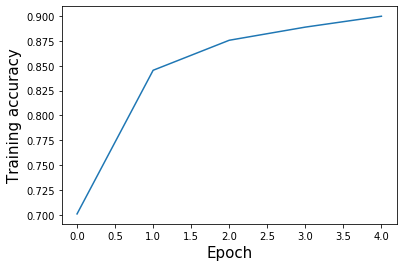

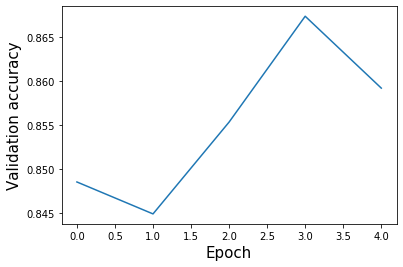

In [30]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Training accuracy', fontsize=15)
plt.show()
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Validation accuracy', fontsize=15)
plt.show()

In [17]:
def getPrediction(index):
    return np.argmax(model.predict(np.array([xTest[index]])))

def showPrediction(index):
    predictions = np.argsort(model.predict(np.array([xTest[index]])))[0][::-1]
    print('Prediction: ', labels[predictions[0]])
    print('Actual: ', labels[data['y_test'][index]])
    print('Correct guess was no.', np.where(predictions == data['y_test'][index])[0][0] + 1)
    showImage(xTest[index])

Prediction:  Wild animals crossing
Actual:  Wild animals crossing
Correct guess was no. 1


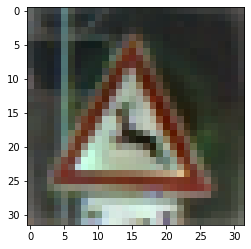

In [23]:
showPrediction(25)

Prediction:  Road narrows on the right
Actual:  Road work
Correct guess was no. 5


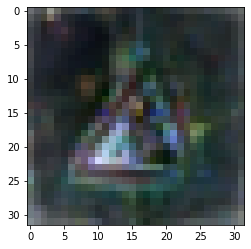

25
Prediction:  Speed limit (60km/h)
Actual:  Speed limit (100km/h)
Correct guess was no. 5


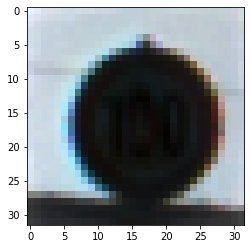

7
Prediction:  Speed limit (50km/h)
Actual:  No entry
Correct guess was no. 4


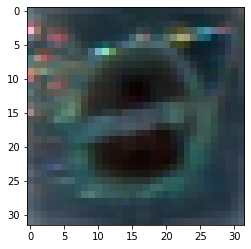

17
Prediction:  Speed limit (80km/h)
Actual:  Speed limit (100km/h)
Correct guess was no. 2


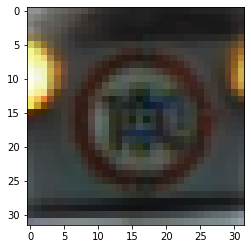

7
Prediction:  Speed limit (60km/h)
Actual:  Speed limit (80km/h)
Correct guess was no. 2


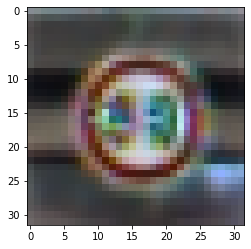

5
Prediction:  Speed limit (50km/h)
Actual:  Speed limit (70km/h)
Correct guess was no. 2


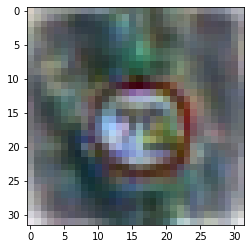

4
Prediction:  Speed limit (70km/h)
Actual:  Speed limit (120km/h)
Correct guess was no. 2


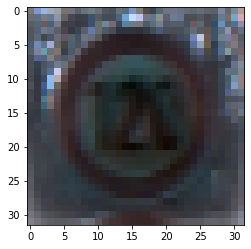

8
Prediction:  Speed limit (30km/h)
Actual:  Speed limit (50km/h)
Correct guess was no. 2


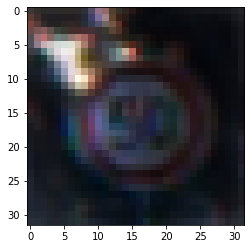

2
Prediction:  Stop
Actual:  Road work
Correct guess was no. 3


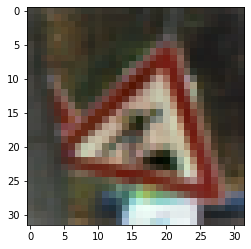

25
Prediction:  Wild animals crossing
Actual:  Double curve
Correct guess was no. 2


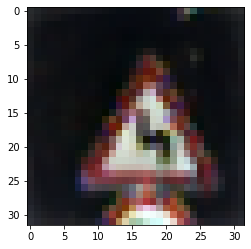

21
Prediction:  Speed limit (80km/h)
Actual:  Speed limit (60km/h)
Correct guess was no. 2


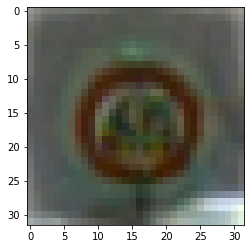

3
Prediction:  General caution
Actual:  Right-of-way at the next intersection
Correct guess was no. 2


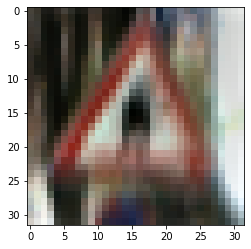

11
Prediction:  Dangerous curve to the left
Actual:  Slippery road
Correct guess was no. 3


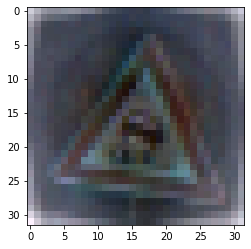

23
Prediction:  Speed limit (100km/h)
Actual:  Speed limit (120km/h)
Correct guess was no. 2


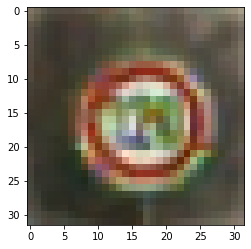

8
Prediction:  Speed limit (30km/h)
Actual:  Speed limit (20km/h)
Correct guess was no. 4


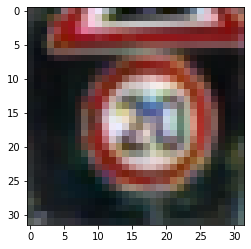

0
Prediction:  Speed limit (60km/h)
Actual:  Speed limit (100km/h)
Correct guess was no. 3


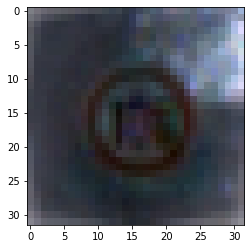

7
Prediction:  Speed limit (80km/h)
Actual:  Speed limit (120km/h)
Correct guess was no. 2


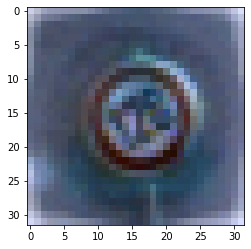

8
Prediction:  Roundabout mandatory
Actual:  Dangerous curve to the right
Correct guess was no. 16


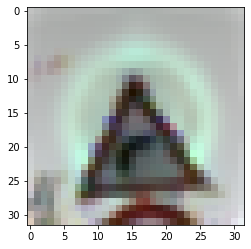

20
Prediction:  Speed limit (120km/h)
Actual:  Speed limit (100km/h)
Correct guess was no. 6


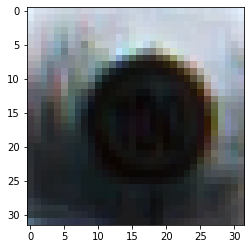

7


In [24]:
for i in range(0, 200):
    if (getPrediction(i) != data['y_test'][i]):
        showPrediction(i)
        print(data['y_test'][i])

## Saving the model

In [55]:
model.save('models/model4')

## Load model

In [58]:
model = load_model('models/model4')

## Saving the model